# Accessing in Python via Julia

## Graphics using PyPlot

In [2]:
using PyCall, PyPlot

INFO: Loading help data...


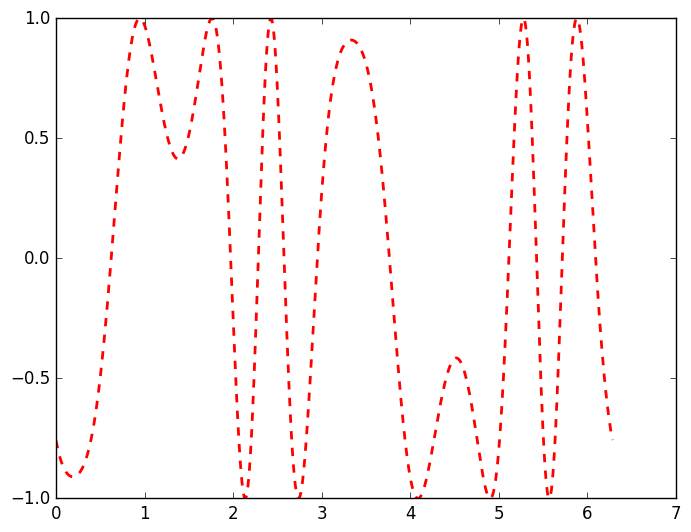

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x10e22c450>

In [2]:
x = linspace(0,2pi,1001);
y = sin(3*x + 4*cos(2*x));
plot(x,y,color="red",linewidth=2.0, linestyle="--")

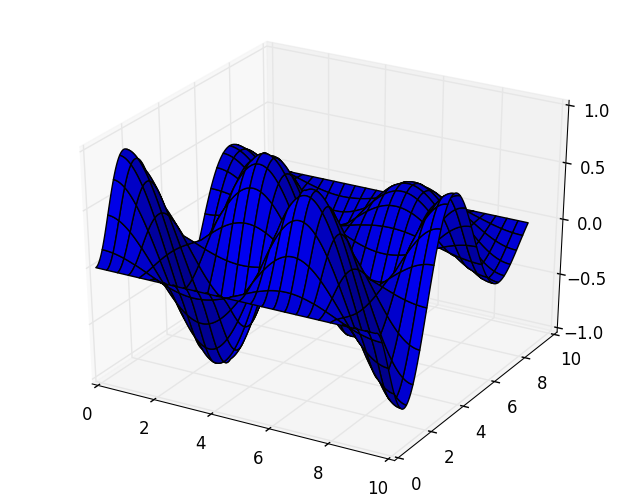

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x10e302890>

In [3]:
z = linspace(0, 3π, 250);
surf(z, z, z.*sin(z).*cos(z)'.*exp(-0.4z))

---

## MySQL database access

[Chinook](https://chinookdatabase.codeplex.com) is a sample database available for SQL Server, Oracle, MySQL, etc.

The Chinook data model represents a digital media store, including tables for artists, albums, media tracks, invoices and customers.<br/>You can see the Chinook data model [here](https://chinookdatabase.codeplex.com/wikipage?title=Chinook_Schema).

- Media related data was created using real data from an iTunes Library. 

- Customer and employee information was manually created using fictitious names, addresses that can be located on Google maps, and other well formatted data (phone, fax, email, etc.).

- Sales information is auto generated using random data for a four year period.


### Query the Chinook database
[Get the database files from here](https://chinookdatabase.codeplex.com)

### Python code

```python
import mysql.connector as mc
cnx = mc.connect(user="malcolm", password="mypasswd", database="Chinook")
csr = cnx.cursor()
qry = "select a.title, b.name from Album a, Artist b where a.ArtistId = b.ArtistId limit 10;"
csr.execute(qry)
for vals in csr:
    print(vals)
    
csr.close()
cnx.close()
```

For this code to work the MySQL daemon must be running and the Chinook data loaded.<br/>If is sensible to test this from the _mysql_ client before executing this code.

The _&lt;user&gt;_ chosen must be granted access rights to the data (at least SELECT privilige ).

THe connection string needs to be amended to reflect the specific: **user/password/database**.  

In [3]:
# Julia version

@pyimport mysql.connector as mc
cnx = mc.connect(user="malcolm", password="mypasswd", database="Chinook")

PyObject <mysql.connector.connection.MySQLConnection object at 0x116373d50>

In [4]:
qry = "select a.title, b.name from Album a, Artist b ";
qry *= "where a.ArtistId = b.ArtistId limit 10;";
csr = cnx[:cursor]();
csr[:execute](qry);

In [5]:
for vals in csr
  album  = vals[1]
  artist = vals[2]
    @printf "%s by %s\n" album artist
end

For Those About To Rock We Salute You by AC/DC
Let There Be Rock by AC/DC
Balls to the Wall by Accept
Restless and Wild by Accept
Big Ones by Aerosmith
Jagged Little Pill by Alanis Morissette
Facelift by Alice In Chains
Warner 25 Anos by Antônio Carlos Jobim
Chill: Brazil (Disc 2) by Antônio Carlos Jobim
Plays Metallica By Four Cellos by Apocalyptica


In [6]:
csr[:close]();
cnx[:close]();

---

## Using SciPy

### Nelder-Mead Simplex algorithm
[Description of the problem](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)

The simplex algorithm is probably the simplest way to minimize a fairly well-behaved function. 

It requires only function evaluations and is a good choice for simple minimization problems. 

However, because it does not use any gradient evaluations, it may take longer to find the minimum.

In [7]:
@pyimport scipy.optimize as so

In [8]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2, 1.1];
opts = Dict();
opts["xtol"] = 1e-8; opts["disp"] =  true;

In [9]:
rosen(x) = sum(100.0*(x[2:end] - x[1:end-1].^2.0).^2.0 + (1 - x[1:end-1]).^2.0);

In [10]:
so.minimize(rosen, x0, method="nelder-mead",options=opts);

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 512
         Function evaluations: 833


---

### Least Squares Fit

The least square algorithm is a well tried and tested technique.

It minimises the sum of the residuals of a _fitted_ curve with its data points in order to estimate the parameters.

Here we create a sinusoid and add some noise, fit the LSQ curve and compare it with the original and the data points.

In [5]:
(A, k, θ) = (10.0, 1.0/0.03, π/6.0);
x = collect(0.0:0.002:0.058);
y_true = A * sin(2π*k*x + θ);
y_meas = y_true + 2*randn(length(x));

In [6]:
function residuals(p, y, x)
  (A, k, θ) = p
  return y - A * sin(2π*k*x + θ)
end;
peval(x, p) =  p[1] * sin(2π*p[2]*x + p[3]);

In [7]:
p0 = [8, 1/2.3e-2, pi/3];
plsq = so.leastsq(residuals, p0, args=(y_meas, x));

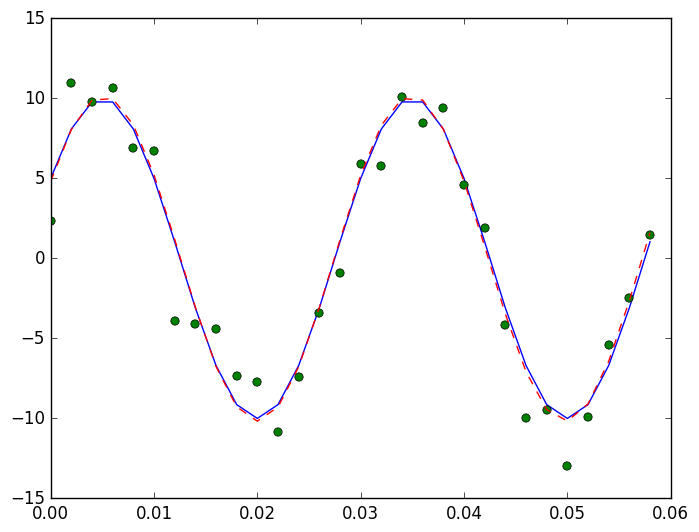

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x10e349390>

In [8]:
p = plot(x, y_true);
p = plot(x, y_meas, marker="o", linestyle=" ");
p = plot(x, peval(x, plsq[1]), linestyle="--");

p

---

## Interactive Widgets in IJulia

IPython 2.0 introduced interactive widgets, which are basically:

* Javascript widgets (sliders, buttons, etc.)
* A communications protocol for the widgets to talk to the kernel
* A Python interface to create and manipulate these.

Thanks to [Shashi Gowda](https://github.com/shashi/), these are accessible from a Julia interface.

In [9]:
using Interact

In [10]:
@manipulate for n in 1:100
    rand(n,n)
end

Slider{Int64}([Input{Int64}] 50,"n",50,1:100)

50x50 Array{Float64,2}:
 0.564946   0.643051   0.0639349  …  0.365177   0.841981    0.576793 
 0.508315   0.294301   0.190391      0.794203   0.775386    0.287248 
 0.738543   0.309976   0.984797      0.704246   0.276982    0.503766 
 0.720612   0.0233824  0.730757      0.240916   0.400796    0.343285 
 0.296428   0.683396   0.917942      0.533427   0.783959    0.0762062
 0.401783   0.136205   0.118298   …  0.706018   0.230039    0.935091 
 0.729225   0.596516   0.296383      0.264329   0.483165    0.523924 
 0.33299    0.551524   0.204784      0.783586   0.405986    0.505629 
 0.65245    0.378181   0.949133      0.204978   0.89034     0.63054  
 0.262845   0.454412   0.834232      0.171997   0.893531    0.986741 
 0.0999608  0.0459165  0.742623   …  0.625857   0.690092    0.126112 
 0.307559   0.867699   0.561791      0.655104   0.0792978   0.765464 
 0.664585   0.651188   0.6613        0.232126   0.00552614  0.148452 
 ⋮                                ⋱                               

### Interactive graphics

In [12]:
using PyPlot

Slider{Float64}([Input{Float64}] 2.5,"α",2.5,1.0:0.1:4.0)

Slider{Float64}([Input{Float64}] 2.5,"β",2.5,1.0:0.1:4.0)

Textbox{String}([Input{String}] an interactive plot,"title",nothing,"an interactive plot")

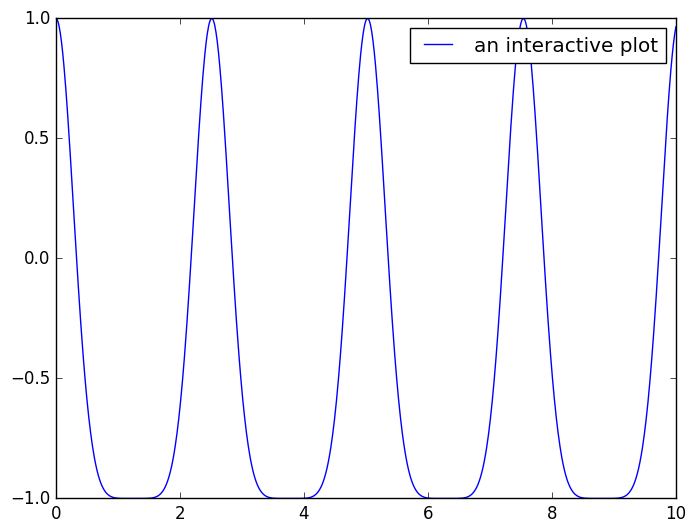

In [13]:
x = linspace(0,10,1000)
f = figure()
@manipulate for α = 1:0.1:4, β = 1:0.1:4, title="an interactive plot"
    withfig(f) do
        plot(x, cos(α*x + sin(β*x)))
        legend([title])
    end
end

### Automating SymPy

In [15]:
using SymPy
x = symbols("x")
@manipulate for n=0:20
    latex(SymPy.diff(sin(x^2), x, n))
end

Slider{Int64}([Input{Int64}] 10,"n",10,0:20)

Latex("","\$\$32 \\left(- 32 x^{10} \\sin{\\left (x^{2} \\right )} + 720 x^{8} \\cos{\\left (x^{2} \\right )} + 5040 x^{6} \\sin{\\left (x^{2} \\right )} - 12600 x^{4} \\cos{\\left (x^{2} \\right )} - 9450 x^{2} \\sin{\\left (x^{2} \\right )} + 945 \\cos{\\left (x^{2} \\right )}\\right)\$\$")

### FX market ticker

_**Run this from a julia command prompt**_

```julia
using PyCall
@pyimport myfinx as fx
fx.run("MSFT")
```